# Data Pre-Processing

<b> In this document, we will try to adapt the data we have to the machine learning model by using various data sets.

In [3]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<b> Overview of the Titanic Dataset

In [4]:
from EDA import check_df

check_df(df)

##################### Shape #####################
(891, 15)
##################### Types #####################
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
##################### Head #####################
##################### Tail #####################
     survived  pclass     sex   age  sibsp  parch   fare embarked   class    who  adult_male deck  embark_town alive  alone
886         0       2    male  27.0      0      0  13.00        S  Second    man        True  NaN  Southampton    no   True
887         1       1  female  19.0      0      0  30.00        S   First  woman       False    B  Southampton   yes   True
888         0       3  female   NaN      1    

# Analysis of Categorical Variables

In [5]:
df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [6]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [7]:
df["class"].nunique()

3

In [8]:
from EDA import *
cat_summary(df,'sex')

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


<b> Let's find out what are categorical variables

In [9]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
cat_cols

Observations: 891
Variables: 15
cat_cols: 9
num_cols: 2
cat_but_car: 0
num_but_cat: 0


['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [10]:
# Numerical columns

num_cols

['age', 'fare']

In [11]:
# Categorical but High cardinality columns

cat_but_car

[]

In [12]:
# Summary for categorical variables
from EDA import cat_summary

for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
##########################################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
##########################################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
##########################################
   adult_male     Ratio
1         537  60.26936
0         354  39.73064
##########################################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
##########################################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
#################################

        sex      Ratio
male    577  64.758698
female  314  35.241302
##########################################


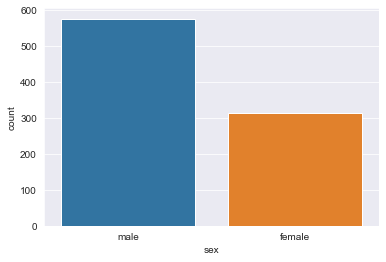

In [13]:
cat_summary(df, "sex", plot=True)

# Analysis of Numerical Variables

In [15]:
num_summary(df, "age")

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


<b> Summary information for all numeric variables

In [16]:
for col in num_cols:
    num_summary(df, col)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64


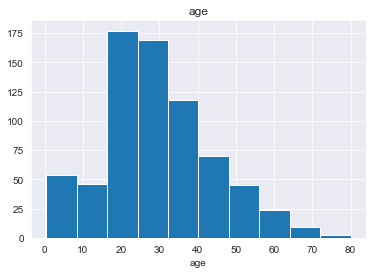

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64


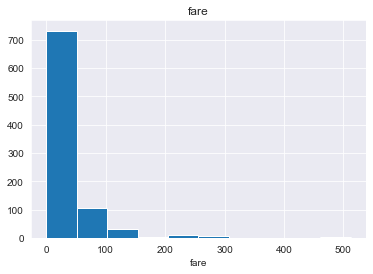

In [17]:
for col in num_cols:
    num_summary(df, col, plot=True)

# Analysis of Target Variable